In [22]:
using DSP;
using Plots;
using WAV;
using SampledSignals;
using LinearAlgebra;
using JLD;
using Pkg;

# EXPERIÊNCIA 6

Gabriel Tavares 10773801

Leitura das variáveis

In [2]:
conversa1, fs = wavread("conversa1.wav")
conversa2, fs = wavread("conversa2.wav")
h = load("respimp.jld")["hi"]
;

In [3]:
v = conversa1
x = conversa2
y = filt(h, x)
d = y + v
;

In [23]:
M = 256
w, erro, μs= NLMS(x, d, M; ϵ = 100)
;

In [24]:
MSD = zeros(size(w)[1])
for i in 1:length(MSD)
    global MSD
    MSD[i] = norm(w[i,:] .- h).^2
end
;

No gráfico abaixo podemos ver a eveolução do filtro. Vemos que o a qualidade do filtro (MSD) sempre aumenta nos pontos onde não há picos de volume em v[n]. Esses são os pontos onde o algoritmo recebe a conversa 2 para poder adaptar o filtro no sentido do filtro ideal.

Podemos notar rapidamente a queda do MSD para se adequar ao filtro original e depois ele se mantém quase constante

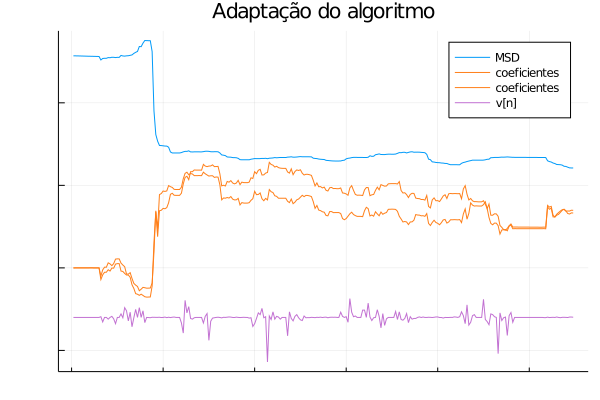

In [25]:
plot(title = "Adaptação do algoritmo")
plot!(MSD[1:1000:end], label = "MSD")
plot!(w[1:1000:end, 1:2].-0.005, label = "coeficientes", color=RGB(1,0.5,0.1))
plot!(v[1:1000:end]*0.003 .- 0.008, label = "v[n]")
plot!(tickfontcolor = RGBA(0,0,0,0))#hide axis values

In [26]:
SampleBuf(erro, fs)

273459-frame, 1-channel SampleBuf{Float64, 2}
34.182375s sampled at 8000.0Hz
▃▃▃▃▇▇▇▇▇▇▇▇▅▄▃▄▃▇▇▆▇▇▇▃▃▃▃▃▇▇▇▇▇▇▇▇▇▄▃▃▃▃▇▇▇▇▇▇▇▇▆▇▇▇▇▃▄▄▃▃▃▇▇▇▅▇▇▇▇▇▇▂▃▃▃▄▃▄▃▄

### Usando DTD

Agora iremos aplicar um detector de fala de Geigel. Nesse detector vemos comparar constantemente a razão entre os sinais d[n] e x[n] com um limiar de detecção para ativar ou não a adaptção dos coeficientes

In [27]:
M = 256
Dt = 2
w, erro, μs = NLMS(x, d, M; ϵ = 50, DTD = true, Dt = Dt)
;

In [28]:
MSD = zeros(size(w)[1])
for i in 1:length(MSD)
    global MSD
    MSD[i] = norm(w[i,:] .- h).^2
end

Usando o detector de fala, podemos ver que o filtro só se adapta nos pontos onde não há picos de sinal em v[n] ou seja, em pontos onde a conversa 2 está acontecendo. Dessa forma os coeficientes se mantém quase constantes nos pontos onde a conversa 1 está alta e se adapta apenas quando tem o sinal de eco.

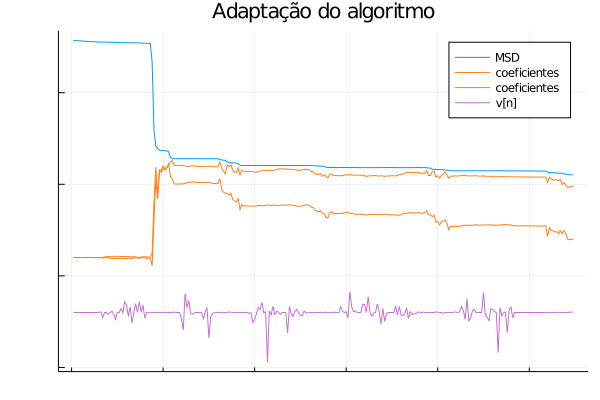

In [29]:
plot(title = "Adaptação do algoritmo")
plot!(MSD[1:1000:end], label = "MSD")
plot!(w[1:1000:end, 1:2].-0.004, label = "coeficientes", color=RGB(1,0.5,0.1))
plot!(v[1:1000:end]*0.003 .- 0.007, label = "v[n]")
plot!(tickfontcolor = RGBA(0,0,0,0))#hide axis values

In [30]:
SampleBuf(erro, fs)

273459-frame, 1-channel SampleBuf{Float64, 2}
34.182375s sampled at 8000.0Hz
▃▃▃▃▇▇▇▇▇▇▇▇▅▃▃▃▃▇▇▆▇▇▇▃▃▃▃▃▇▇▇▇▇▇▇▇▇▄▃▃▃▃▇▇▇▇▇▇▇▇▆▇▇▇▇▃▃▃▃▄▃▇▇▇▅▇▇▇▇▇▇▂▃▃▃▃▃▄▃▃

### Usando PVSS

Nessa etapa usamos um fator variável no passo de adaptação para ser mais alto quando não estiver acontecendo a fala (conversa 1)

In [31]:
M = 256
w, erro, μs = NLMS(x, d, M; ϵ = 50 , PVSS = true)
;

In [32]:
MSD = zeros(size(w)[1])
for i in 1:length(MSD)
    global MSD
    MSD[i] = norm(w[i,:] .- h).^2
end

Usando o algoritmo LMS com PVSS vemos que os coeficientes caminham mais devagar, porém com uma estabilidade maior. Mesmo com sem usar o detector de fala, ainda apresenta uma patamares nos momentos sem eco.

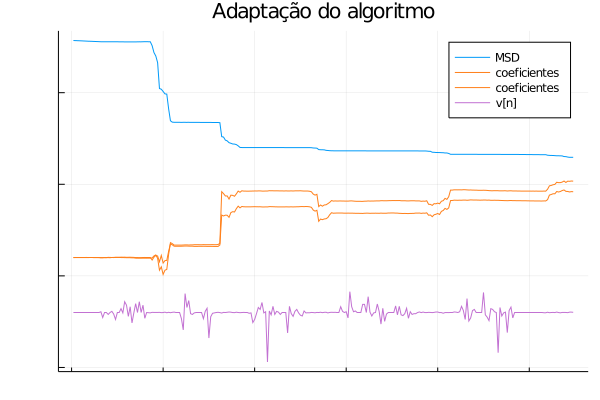

In [33]:
plot(title = "Adaptação do algoritmo")
plot!(MSD[1:1000:end], label = "MSD")
plot!(w[1:1000:end, 1:2].-0.004, label = "coeficientes", color=RGB(1,0.5,0.1))
plot!(v[1:1000:end]*0.003 .- 0.007, label = "v[n]")
plot!(tickfontcolor = RGBA(0,0,0,0))#hide axis values

In [34]:
SampleBuf(erro, fs)

273459-frame, 1-channel SampleBuf{Float64, 2}
34.182375s sampled at 8000.0Hz
▃▃▃▃▇▇▇▇▇▇▇▇▅▅▄▄▃▇▇▆▇▇▇▄▄▃▃▃▇▇▇▇▇▇▇▇▇▄▃▃▃▃▇▇▇▇▇▇▇▇▆▇▇▇▇▃▃▃▃▄▃▇▇▇▅▇▇▇▇▇▇▃▃▃▃▃▃▃▃▃

### Usando DTD e PVSS

Aqui usamos os dois algoritmos juntos para verificar a qualidade do nosso eliminador de eco

In [35]:
M = 256
Dt = 2
w, erro, μs = NLMS(x, d, M; ϵ = 50 , DTD=true, Dt = Dt, PVSS = true)
;

In [36]:
MSD = zeros(size(w)[1])
for i in 1:length(MSD)
    global MSD
    MSD[i] = norm(w[i,:] .- h).^2
end

Usando o PVSS e DTD junto, o resultado não foi muito diferente de usando apenas o PVSS

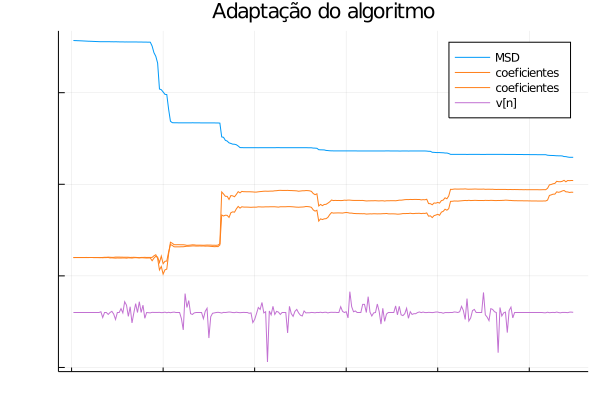

In [37]:
plot(title = "Adaptação do algoritmo")
plot!(MSD[1:1000:end], label = "MSD")
plot!(w[1:1000:end, 1:2].-0.004, label = "coeficientes", color=RGB(1,0.5,0.1))
plot!(v[1:1000:end]*0.003 .- 0.007, label = "v[n]")
plot!(tickfontcolor = RGBA(0,0,0,0))#hide axis values

In [38]:
SampleBuf(erro, fs)

273459-frame, 1-channel SampleBuf{Float64, 2}
34.182375s sampled at 8000.0Hz
▃▃▃▃▇▇▇▇▇▇▇▇▅▅▄▄▃▇▇▆▇▇▇▄▄▃▃▃▇▇▇▇▇▇▇▇▇▄▃▃▃▃▇▇▇▇▇▇▇▇▆▇▇▇▇▃▃▃▃▄▃▇▇▇▅▇▇▇▇▇▇▃▃▃▃▃▃▃▃▃

## Conclusão

Nessa experiência verificamos o funcionamento de um eliminador de eco. 

Primeiro usamos apenas o algoritimo DTD o filtro se adapta apenas quando não identifica uma fala, e isso traz uma estabilidade nos coeficientes nesses momentos. Dessa forma, o filtro só se adapta nos momentos onde identifica apenas o eco do sistema.

Usando apenas o algoritimo PVSS, o sistema também tem uma estabilidade nos momentos de fala através do ajuste de alfa, e tem um passo de adaptação relevante apenas nos momentos de eco. No entanto ele converge mais devagar para o filtro ideal

Usando os dois algoritimos juntos, a convergência é parecida com o uso apenas do PVSS já que ambos eles tem uma papel semelhante em controlar o passo de adaptação conforme é ou não detectado fala ou eco.

# Functions

In [20]:
function NLMS(x, d, M; μ₀= 1, ϵ = 1000, DTD = false, Dt = 50, PVSS= false)
    N = length(x)
    Φ = zeros(M,1)
    W = zeros(N,M)
    erro = zeros(N,1)
    
    μs = zeros(N)
    
    #DTD constants
    dg = zeros(N)
    
    #PVSS constants
    α = zeros(N)
    σd² = zeros(N)
    σy² = zeros(N)
    σe² = zeros(N)
    λd = 0.99
    ζ = 0.002
    

    for n in 1:N-1
        μ = 0

        Φ = [x[n]; Φ[1:M-1]]
        y = W[n,:]'*Φ
        erro[n] = d[n]-y

        # check if coeficients must be updated
        update_μ = false
        if DTD
            dg[n] = abs(d[n])/maximum(Φ)
            if dg[n] <=  Dt
                update_μ = true
            end
        else
            update_μ = true
        end
                    

        # update μ
        if update_μ
            if PVSS
                if n < N-1
                    σd²[n + 1] = λd*σd²[n] + (1 - λd)*d[n]^2
                    σy²[n + 1] = λd*σy²[n] + (1 - λd)*y^2
                    σe²[n + 1] = λd*σe²[n] + (1 - λd)*erro[n]^2
                end
                α[n] = abs(1 - sqrt(abs(σd²[n+1] - σy²[n+1]))/(ζ + sqrt(σe²[n+1])) )
                μ = α[n]*μ₀/(ϵ + norm(Φ)^2)
            else
                μ = μ₀/(ϵ + norm(Φ)^2)
            end
        end

        W[n+1, :] = W[n,:] +μ*erro[n]*Φ
        μs[n] = μ
    end
    return W, erro, μs
end

NLMS (generic function with 1 method)

In [21]:
function DSP.freqz(h::Vector)
    return freqz(PolynomialRatio(h, [1]))
end